# Zaman et al.

### define process data function

In [24]:
def compare_brine_concentrations(dataframe, raw_data, export_path, elemental_masses, literature_cf, original_concentrations = True):
    from chempy.properties.water_density_tanaka_2001 import water_density
    from sigfig import round
    from pprint import pprint
    from scipy.constants import milli, kilo
    from matplotlib import pyplot
    import matplotlib

    pandas.set_option('display.max_columns', None)
    pandas.set_option('display.max_rows', None)
    print('selected_output')
    display(raw_data)
    print('processed_data')
    display(dataframe)
    
    # final effluent concentrations
    final_cf = raw_data['mass_H2O'].iloc[0] / raw_data['mass_H2O'].iloc[-1]
    last_row = dataframe.iloc[-1]
    print('literature_cf', literature_cf)
    print('final_cf', final_cf)

    # feed concentrations
    water_density = water_density()/kilo
    solution_description = 'Zaman'
    custom_water_parameters = {
        'element': {
            'Ca': {
                'concentration (ppm)':0.21*elemental_masses['Ca'],
                'reference': ''
            },
            'Mg': {
                'concentration (ppm)':0.1*elemental_masses['Mg'],
                'reference':''
            },
            'Na': {
                'concentration (ppm)':109.04*elemental_masses['Na'],
                'reference':''
            },
            'Sr': {
                'concentration (ppm)':0.044*elemental_masses['Sr'],
                'reference':''
            },
            'Cl': {
                'concentration (ppm)':72.73*elemental_masses['Cl'],
                'reference':''
            },
            'S(6)': {
                'concentration (ppm)':0.375*elemental_masses['S'],
                'reference':''
            },
            'Ba': {
                'concentration (ppm)':0.019*elemental_masses['Ba'],
                'reference':''
            },
            'B': {
                'concentration (ppm)':0.27*elemental_masses['B'],
                'reference':''
            },
            'K': {
                'concentration (ppm)':0.37*elemental_masses['K'],
                'reference':''
            }
        },
        'pH': {
            'value': 9.125,
            'reference': ''
        }
    }
    
    def make_molal(elements):
        molals = {}
        for element in elements:
            original_element = element
            element = re.sub('(?:\(\d\))', '', element)
            mass = elemental_masses[element]/milli
            if type(elements[original_element]) is dict:
                ppm_conc = elements[original_element]['concentration (ppm)']
            else:
                ppm_conc = elements[original_element]
            molal_conc = ppm_conc / water_density / mass
            molals[original_element] = float(molal_conc)
            
        return molals

    molals = make_molal(custom_water_parameters['element'])
    literature_molals = make_molal(literature_final_conc)
    
    # final effluent CF for each element
    cfs = {}
    diff_list = []
    labels = []
    print(ross.predicted_effluent)
    for element, final_conc in last_row.iteritems():
        element = re.search('([A-Z][a-z]?(?:\(\d\))?(?=\(mol\/kgw\)))', element).group()
        cfs[element] = {}
        initial_conc = molals[element]

        if original_concentrations:
            if element in literature_elemental_cfs:
                cfs[element]['cf'] = float(final_conc) / initial_conc
                diff = ((cfs[element]['cf'] - literature_elemental_cfs[element]) / literature_elemental_cfs[element]) * 100
                labels.append(element)
                diff_list.append(diff)
                cfs[element]['% diff'] = diff
                
        elif not original_concentrations:
            if element in literature_final_conc:
                predicted_conc = float(ross.predicted_effluent[element])
                literature_conc = float(literature_final_conc[element])
                diff = ((predicted_conc - literature_conc) / literature_conc) * 100
                labels.append(element)
                diff_list.append(diff)
                cfs[element]['% diff'] = diff

    # define a bar graph of CF error 
    pprint(cfs)
    labels.append('CF')
    total_cf_error = ((final_cf - literature_cf) / literature_cf * 100)
    diff_list.append(total_cf_error)
    min_diff = min(diff_list) - 5
    max_diff = max(diff_list) + 5

    pyplot.rcParams['figure.figsize'] = (12, 9)
    pyplot.rcParams['figure.dpi'] = 100
    figure, ax = pyplot.subplots()
    bar_graph = ax.bar(labels, diff_list)
    ax.axhline(0, color='grey', linewidth=0.8)
    ax.set_ylabel('relative % difference')
    ax.set_ylim(min_diff, max_diff)
    ax.set_xlabel('Element')
    ax.set_title('Elemental difference of ROSSpy from Zaman et al.')
    diff_list = [round(value, 2, notation = 'sci') for value in diff_list]
    ax.bar_label(bar_graph, diff_list)
    if export_path is not None:
        figure.savefig(export_path)

<>:74: DeprecationWarning: invalid escape sequence \(
<>:94: DeprecationWarning: invalid escape sequence \(
<>:74: DeprecationWarning: invalid escape sequence \(
<>:94: DeprecationWarning: invalid escape sequence \(
<>:74: DeprecationWarning: invalid escape sequence \(
<>:94: DeprecationWarning: invalid escape sequence \(
<ipython-input-24-58622f3dd80c>:74: DeprecationWarning: invalid escape sequence \(
  element = re.sub('(?:\(\d\))', '', element)
<ipython-input-24-58622f3dd80c>:94: DeprecationWarning: invalid escape sequence \(
  element = re.search('([A-Z][a-z]?(?:\(\d\))?(?=\(mol\/kgw\)))', element).group()


### Experimental conditions

In [16]:
from scipy.constants import nano, milli, day, hour
from chemicals import periodic_table
import os,re 

elemental_masses = {}
for element in periodic_table:
    elemental_masses[element.symbol] = element.MW
    
def average(some_list):
    return sum(some_list)/ len(some_list)

# water parameters
solution_description = 'Zaman'
water_characteristics = {
    'element': {
        'Ca': {
            'concentration (ppm)':0.21*elemental_masses['Ca'],
            'reference': ''
        },
        'Mg': {
            'concentration (ppm)':0.1*elemental_masses['Mg'],
            'reference':''
        },
        'Na': {
            'concentration (ppm)':109.04*elemental_masses['Na'],
            'reference':''
        },
        'Sr': {
            'concentration (ppm)':0.044*elemental_masses['Sr'],
            'reference':''
        },
        'Cl': {
            'concentration (ppm)':72.73*elemental_masses['Cl'],
            'reference':''
        },
        'S(6)': {
            'concentration (ppm)':0.375*elemental_masses['S'],
            'reference':''
        },
        'Ba': {
            'concentration (ppm)':0.019*elemental_masses['Ba'],
            'reference':''
        },
        'B': {
            'concentration (ppm)':0.27*elemental_masses['B'],
            'reference':''
        },
        'K': {
            'concentration (ppm)':0.37*elemental_masses['K'],
            'reference':''
        }
    },
    'pH': {
        'value': 9.125,
        'reference': ''
    }
}

# literature final effluent concentrations 
literature_final_conc = {
    'Ca': 1.1*elemental_masses['Ca'],
    'Mg': 0.49*elemental_masses['Mg'],
    'Na': 561.44*elemental_masses['Na'],
    'Sr': 0.208*elemental_masses['Sr'],
    'Ba': 0.1*elemental_masses['Ba'],
    'B': 1.31*elemental_masses['B'],
    'Cl': 381.6*elemental_masses['Cl'],
    'K': 1.85*elemental_masses['K'],
    'S(6)': 1.64*elemental_masses['S']
}
literature_elemental_cfs = {}
for element in literature_final_conc:
    true_element = re.search('([A-Z][a-z]?)', element).group()
    literature_elemental_cfs[element] = literature_final_conc[element]/(water_characteristics['element'][element]['concentration (ppm)'])
literature_cf = average([(literature_elemental_cfs[element]) for element in literature_elemental_cfs])

# general parameters
database_selection = 'pitzer'
simulation = 'brine'
simulation_time = 275

## Execute through all_time


Estimated completion in 8 seconds: 2022-04-08 12:04:05.305585 local time.
run_time (s): 9.866073499999402
selected_output


,sim,state,soln,dist_x,time,step,pH,pe,reaction,temp(C),Alk(eq/kgw),mu,mass_H2O,charge(eq),Ca(mol/kgw),Mg(mol/kgw),Na(mol/kgw),Sr(mol/kgw),Cl(mol/kgw),S(6)(mol/kgw),Ba(mol/kgw),B(mol/kgw),K(mol/kgw),Anhydrite,d_Anhydrite,Aragonite,d_Aragonite,Arcanite,d_Arcanite,Artinite,d_Artinite,Barite,d_Barite,Bischofite,d_Bischofite,Bloedite,d_Bloedite,Brucite,d_Brucite,Burkeite,d_Burkeite,Calcite,d_Calcite,Carnallite,d_Carnallite,Celestite,d_Celestite,Dolomite,d_Dolomite,Epsomite,d_Epsomite,Gaylussite,d_Gaylussite,Glaserite,d_Glaserite,Glauberite,d_Glauberite,Goergeyite,d_Goergeyite,Gypsum,d_Gypsum,Halite,d_Halite,Hexahydrite,d_Hexahydrite,Huntite,d_Huntite,Kainite,d_Kainite,Kieserite,d_Kieserite,Labile_S,d_Labile_S,Leonhardite,d_Leonhardite,Leonite,d_Leonite,Magnesite,d_Magnesite,MgCl2_2H2O,d_MgCl2_2H2O,MgCl2_4H2O,d_MgCl2_4H2O,Mirabilite,d_Mirabilite,Natron,d_Natron,Nesquehonite,d_Nesquehonite,Pentahydrite,d_Pentahydrite,Pirssonite,d_Pirssonite,Polyhalite,d_Polyhalite,Portlandite,d_Portlandite,Schoenite,d_Schoenite,Sylvite,d_Sylvite,Syngenite,d_Syngenite,Thenardite,d_Thenardite,Teepleite,d_Teepleite,si_Anhydrite,si_Aragonite,si_Arcanite,si_Artinite,si_Barite,si_Bischofite,si_Bloedite,si_Brucite,si_Burkeite,si_Calcite,si_Carnallite,si_Celestite,si_Dolomite,si_Epsomite,si_Gaylussite,si_Glaserite,si_Glauberite,si_Goergeyite,si_Gypsum,si_Halite,si_Hexahydrite,si_Huntite,si_Kainite,si_Kieserite,si_Labile_S,si_Leonhardite,si_Leonite,si_Magnesite,si_MgCl2_2H2O,si_MgCl2_4H2O,si_Mirabilite,si_Natron,si_Nesquehonite,si_Pentahydrite,si_Pirssonite,si_Polyhalite,si_Portlandite,si_Schoenite,si_Sylvite,si_Syngenite,si_Thenardite,si_Teepleite
3,1,transp,12,0.973667,0.000000,0,7.000000,4.0,10.487601,25.0,1.216293e-09,1.006454e-07,13.171724,-1.602067e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999.999000,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-9.999990e+02,-999.999,-999.999,-999.999000,-999.999000,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000
4,1,transp,12,0.973667,2.991110,1,7.000040,4.0,10.487601,25.0,1.234914e-09,1.006455e-07,12.973106,-1.602067e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999.999000,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-9.999990e+02,-999.999,-999.999,-999.999000,-999.999000,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000
5,1,transp,12,0.973667,5.982220,2,7.000088,4.0,10.487601,25.0,1.257209e-09,1.006455e-07,12.743052,-1.602067e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000

processed_data


,Ca(mol/kgw),Mg(mol/kgw),Na(mol/kgw),Sr(mol/kgw),Cl(mol/kgw),S(6)(mol/kgw),Ba(mol/kgw),B(mol/kgw),K(mol/kgw)
Time (s),,,,,,,,,
29.9,3.117494e-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32.9,8.175194e-10,3.395922e-11,4.245078e-07,1.712983e-10,2.831483e-07,4.384456e-10,2.510717e-11,1.051246e-09,1.440463e-09
35.9,1.025268e-03,2.648133e-08,5.323839e-01,2.148287e-04,3.551021e-01,5.305806e-04,1.220439e-05,1.318389e-03,1.806514e-03
38.9,1.025270e-03,2.648127e-08,5.323853e-01,2.148293e-04,3.551030e-01,5.305819e-04,1.220439e-05,1.318392e-03,1.806519e-03
41.9,1.025270e-03,2.648127e-08,5.323853e-01,2.148293e-04,3.551030e-01,5.305819e-04,1.220439e-05,1.318392e-03,1.806519e-03
44.9,1.025270e-03,2.648127e-08,5.323853e-01,2.148293e-04,3.551030e-01,5.305819e-04,1.220439e-05,1.318392e-03,1.806519e-03
47.9,1.025270e-03,2.648127e-08,5.323853e-01,2.148293e-04,3.551030e-01,5.305819e-04,1.220439e-05,1.318392e-03,1.806519e-03
50.8,1.025270e-03,2.648127e-08,5.323853e-01,2.148293e-04,3.551030e-01,5.305819e-04,1.220439e-05,1.318392e-03,1.806519e-03
53.8,1.025270e-03,2.648127e-08,5.323853e-01,2.148293e-04,3.551030e-01,5.305819e-04,1.220439e-05,1.318392e-03,1.806519e-03


literature_cf 4.972161162264564
final_cf 4.857426077233187
{'Ca': 41.84759776286023, 'Mg': 12.084837704884025, 'Na': 12464.236079710994, 'Sr': 19.16907348565533, 'Cl': 12820.701099045735, 'S(6)': 59.787130375504965, 'Ba': 12.973427542675811, 'B': 14.513589267815396, 'K': 71.92912804511039}
{'B': {'% diff': 2.4796575428574292},
 'Ba': {'% diff': -5.528937916973284},
 'Ca': {'% diff': -5.076923265858334},
 'Cl': {'% diff': -5.234465059878981},
 'K': {'% diff': -0.5567767547087182},
 'Mg': {'% diff': 1.4726767809094925},
 'Na': {'% diff': -3.4332336254402724},
 'S(6)': {'% diff': 13.692709503000719},
 'Sr': {'% diff': 5.180332278673474}}


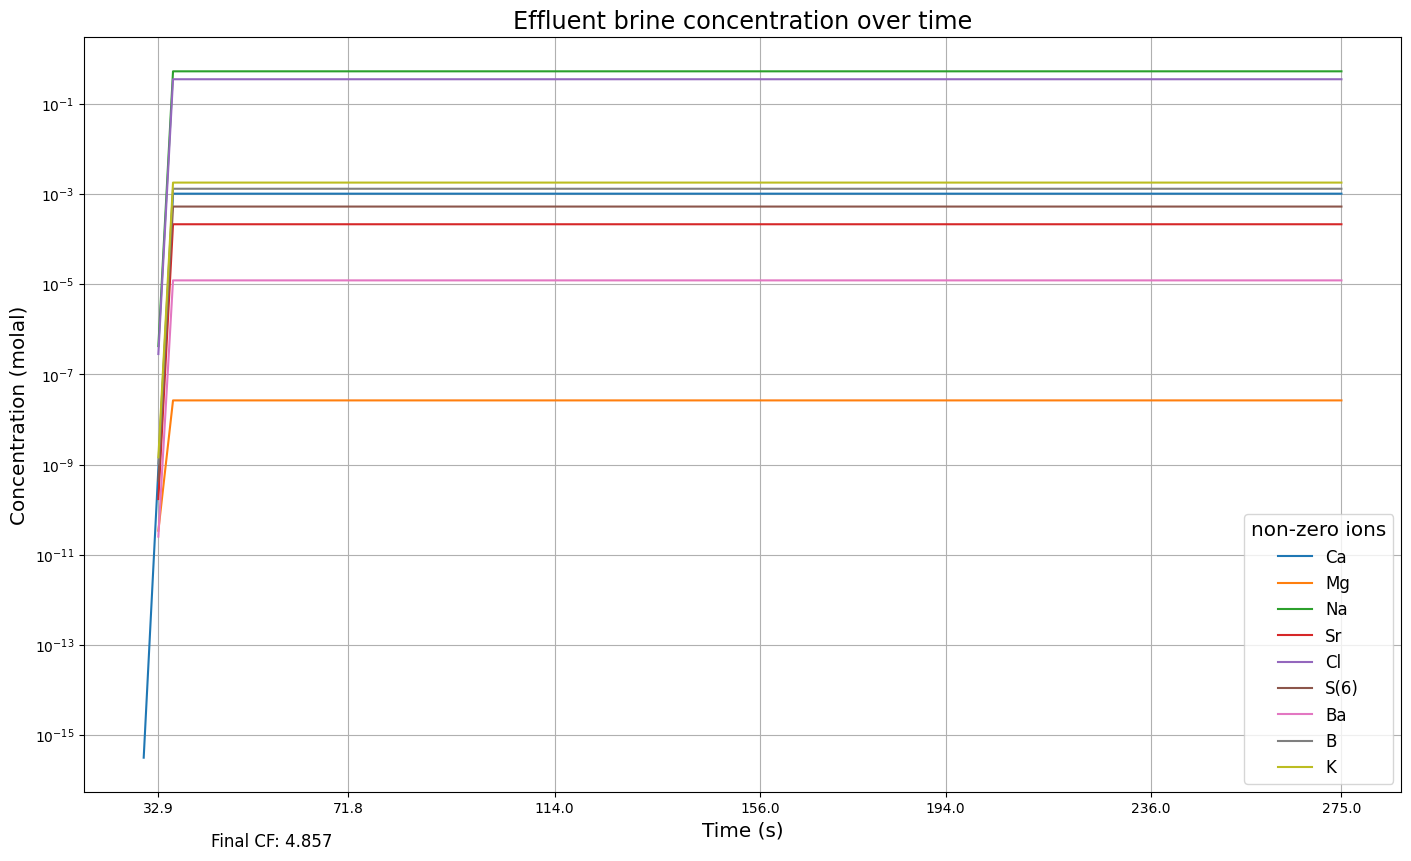

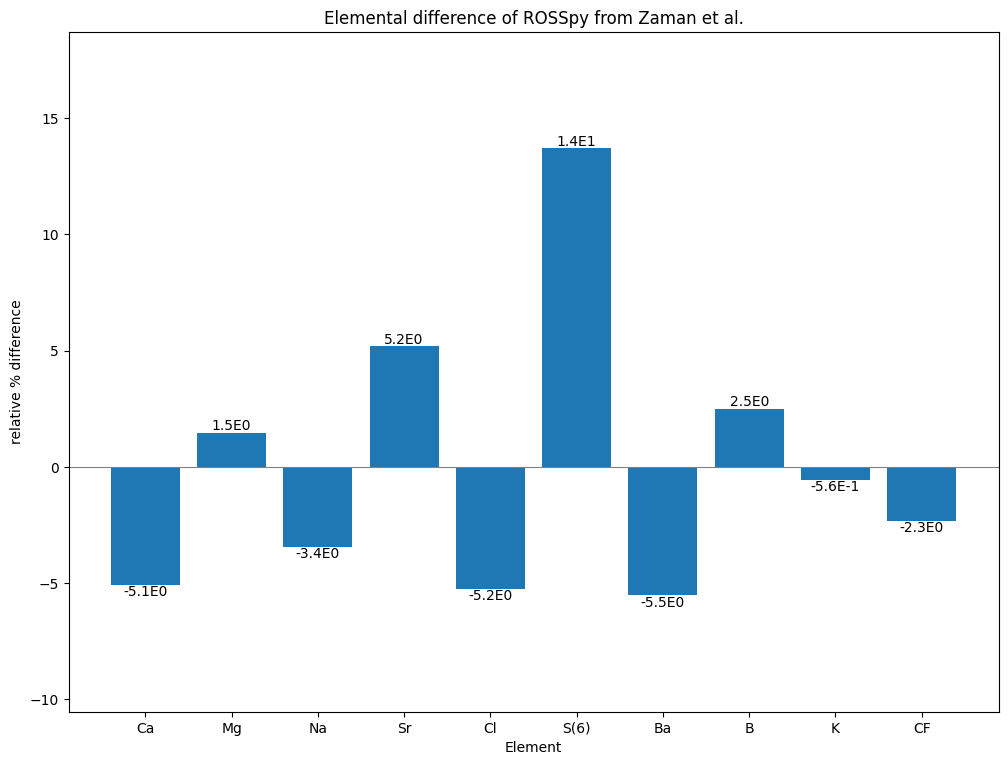

In [25]:
%run ../../../rosspy/ro.py
# ross = ROSSPkg()
# import rosspy
# ross = rosspy.ROSSPkg(verbose = False)

simulation_name = 'PHREEQ_ionic_concentrations'
simulation_perspective = 'all_time'

# create the input file
ross = ROSSPkg(database_selection, simulation, printing = False, export_content = False)
ross.reactive_transport(simulation_time, simulation_perspective, literature_cf)
ross.feed_geochemistry('', water_characteristics, solution_description)
ross.execute(simulation_name)

# process and export the data
export_path = None
if ross.export_content:
    export_path = os.path.join(ross.simulation_path, 'Zaman_comparison.png')
compare_brine_concentrations(ross.processed_data, ross.selected_output, export_path, elemental_masses, literature_cf, export)

## Execute through all_time, with improved predictions


Estimated completion in 8 seconds: 2022-04-08 11:14:11.057904 local time.
run_time (s): 9.813054100000045


,Ca(mol/kgw),Mg(mol/kgw),Na(mol/kgw),Sr(mol/kgw),Cl(mol/kgw),S(6)(mol/kgw),Ba(mol/kgw),B(mol/kgw),K(mol/kgw)
Time (s),,,,,,,,,
29.9,3.117494e-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32.9,8.175194e-10,3.395922e-11,4.245078e-07,1.712983e-10,2.831483e-07,4.384456e-10,2.510717e-11,1.051246e-09,1.440463e-09
35.9,1.025268e-03,2.648133e-08,5.323839e-01,2.148287e-04,3.551021e-01,5.305806e-04,1.220439e-05,1.318389e-03,1.806514e-03
38.9,1.025270e-03,2.648127e-08,5.323853e-01,2.148293e-04,3.551030e-01,5.305819e-04,1.220439e-05,1.318392e-03,1.806519e-03
41.9,1.025270e-03,2.648127e-08,5.323853e-01,2.148293e-04,3.551030e-01,5.305819e-04,1.220439e-05,1.318392e-03,1.806519e-03
...,...,...,...,...,...,...,...,...,...
263.0,1.025270e-03,2.648127e-08,5.323853e-01,2.148293e-04,3.551030e-01,5.305819e-04,1.220439e-05,1.318392e-03,1.806519e-03
266.0,1.025270e-03,2.648127e-08,5.323853e-01,2.148293e-04,3.551030e-01,5.305819e-04,1.220439e-05,1.318392e-03,1.806519e-03
269.0,1.025270e-03,2.648127e-08,5.323853e-01,2.148293e-04,3.551030e-01,5.305819e-04,1.220439e-05,1.318392e-03,1.806519e-03


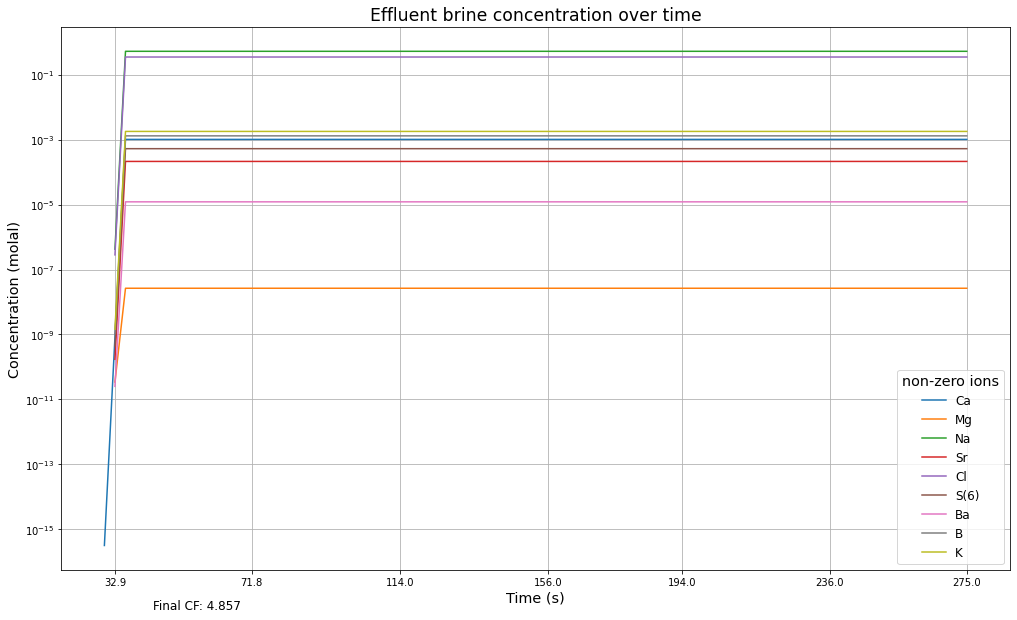

In [14]:
%run ../../../rosspy/ro.py

simulation_perspective = 'all_time'
simulation_name = 'CF_ionic_concentrations'

# create the input file
ross = ROSSPkg(database_selection, simulation, printing = False, export_content = False)
ross.reactive_transport(simulation_time, simulation_perspective, literature_cf)
ross.feed_geochemistry('', water_characteristics, solution_description)
ross.execute(simulation_name)

# process and export the data
export_path = os.path.join(ross.simulation_path, 'Zaman_comparison.png')
compare_brine_concentrations(ross.processed_data, ross.selected_output, export_path, elemental_masses, literature_cf, False)

## Execute a single module over all_distance


Estimated completion in 8 seconds: 2022-04-08 10:52:53.090084 local time.
run_time (s): 9.82586409999999


,sim,state,soln,dist_x,time,step,pH,pe,reaction,temp(C),...,si_Nesquehonite,si_Pentahydrite,si_Pirssonite,si_Polyhalite,si_Portlandite,si_Schoenite,si_Sylvite,si_Syngenite,si_Thenardite,si_Teepleite
3,1,transp,1,0.042333,0.000000,0,7.000000,4.0,181.829484,25.0,...,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000
4,1,transp,2,0.127000,0.000000,0,7.000000,4.0,109.402253,25.0,...,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000
5,1,transp,3,0.211667,0.000000,0,7.000000,4.0,73.062180,25.0,...,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000
6,1,transp,4,0.296333,0.000000,0,7.000000,4.0,52.249784,25.0,...,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000
7,1,transp,5,0.381000,0.000000,0,7.000000,4.0,39.221579,25.0,...,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000
8,1,transp,6,0.465667,0.000000,0,7.000000,4.0,30.525987,25.0,...,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000
9,1,transp,7,0.550333,0.000000,0,7.000000,4.0,24.433599,25.0,...,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000
10,1,transp,8,0.635000,0.000000,0,7.000000,4.0,19.999602,25.0,...,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000
11,1,transp,9,0.719667,0.000000,0,7.000000,4.0,16.672165,25.0,...,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000
12,1,transp,10,0.804333,0.000000,0,7.000000,4.0,14.111358,25.0,...,-999.999,-999.999000,-999.999,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000,-999.999000


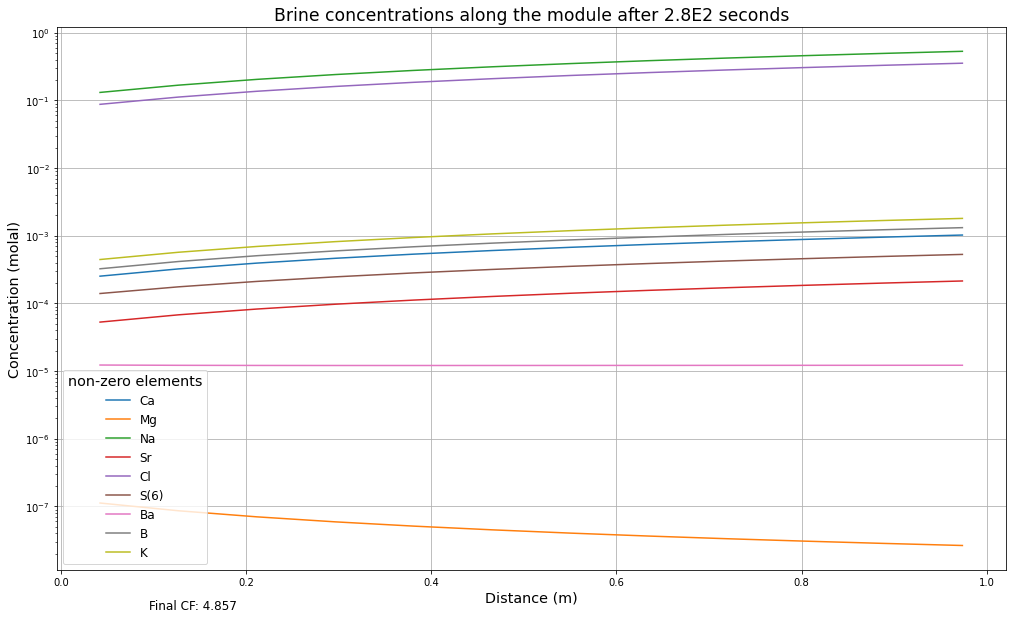

In [13]:
%run ../../../rosspy/ro.py

simulation_perspective = 'all_distance'
simulation_name = 'concentrations_over_module'

# create the input file
ross = ROSSPkg(database_selection, simulation, printing = False, export_content = False)
ross.reactive_transport(simulation_time, simulation_perspective, literature_cf)
ross.feed_geochemistry('', water_characteristics, solution_description)
ross.execute(simulation_name)
display(ross.selected_output)

# process and export the data
export_path = os.path.join(ross.simulation_path, 'Zaman_comparison.png')
compare_brine_concentrations(ross.processed_data, ross.selected_output, export_path, elemental_masses, literature_cf, False)